# Baseball Lab 5


Welcome to the fifth baseball lab. This lab is due by  **Monday March 15th at 11:30pm**. 

As always, you are welcome to work with others on the lab, but if you do work with others after class, please note on the reflection quiz who you worked with. If you have questions about the homework please use [Ed discussions](https://edstem.org/us/courses/4202/discussion/) so that everyone can benefit from your question. Additionally, please answer questions others raise on Ed discussions. Finally, please feel free to attend Neel's and my office hours for additional help. 


#### Today's Baseball Lab

In today's exercises, you'll get practice:

1. Adding visualizations to the Baseball_Game object 
2. Simulating All-Star Baseball in Python
3. Using tree diagrams to calculate probabilities

Readings that will be useful for solving the problems below are [chapter 9](https://www.inferentialthinking.com/chapters/09/Randomness.html) and [chapter 10](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html) of the class textbook. 

The code below loads the retrosheet data and packages that are needed for this homework.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datascience import *
import pandas as pd
import numpy as np

# load the retrosheet data from 2019
data_url = 'https://raw.githubusercontent.com/emeyers/SDS173/master/data/compressed_retro_data/all_2019.gz'
retro_data = Table.from_df(pd.read_csv(data_url))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (63,64,65,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part 1: Adding visualizations to our Baseball_Game object

In lab 4, you created the `Baseball_Game` object that kept track of the state of a baseball game. You also created a special method that enables you to print the state of a baseball game using the `print()` function. However, it can be easier to understand, and more aesthetically pleasing, to see a visualizations of the state of a baseball game rather than just printing out the state. Let's now add a method to our `Baseball_Game` object that create a visualiziation of the state of the game using Matplotlib's graphics. 

**Exercise 1.1 (18 points):** Please add a method called `display_game(self, batter_name = "", center_string = "")` that displays a visualization of the state of a baseball game. To do this problem, please start with the file `baseball_game_with_graphics.py` which has a partial implementation of this method (i.e., it has a number of graphical elements that will be useful when constructing your solution). Your display of the state of the game should have the following properties: 

1. It should display a baseball diamond with red dots indicating whether a running is on a particular base.
2. It should display the number of balls, strikes and outs.
3. It should display the inning and the score.
4. It should have an optional argument, `batter_name`, for the name of the current batter (e.g., the default is set to the empty string)
5. It should have an optional argument `center_string`, for a string displayed in the middle of the baseball diamond.

An example of such a graphic is shown below. 

<img src="https://raw.githubusercontent.com/emeyers/SDS173/master/images/Baseball_Game_visualization.png">


Once you have created the `display_game()` method, show that it works by displaying a baseball game in which David Ortiz is batting in the bottom of the 14th with the score tied at 4-4, there is a runner on 1st and 2nd base, with a count of 2 balls and 2 strikes, and the `center_string` is set to the value `Esteban Loaiza`.




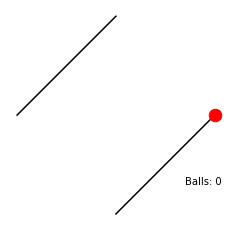

In [5]:


import baseball_game_with_graphics as game

my_game = game.Baseball_Game()




# display the baseball game here...
my_game.display_game("David Ortiz", "Esteban Loaiza")



# Part 2: Simulating All-Star Baseball


For the second set of exercises we will use Python to simulate the [All-Star Baseball board game](https://en.wikipedia.org/wiki/All_Star_Baseball). To do this you will use the retrosheet play-by-play data set and you will simulate a game using the following steps: 

1. You will write a function `get_spinner_probabilities(retro_id)` that takes in a player's retrosheet ID, and returns a table with the proportion of times the player had different batting outcomes (e.g., got out, hit a single, etc.). These proporitons will be used to represent the areas of the All-Star baseball "spinners disks". 

2. You will write a function `get_lineups(game_id)` that extracts the batting lineup for a game. 

3. You will write a funciton `get_all_spinners(away_lineup, home_lineup)` that takes the lineups and returns a list of spinners for each batter in the lineup. 

4. You will then simulate a game by looping through the batting line-up, generating different random hitting outcomes for each player based on the spinners you created. You will use the Baseball_Game object from lab 4 to keep track of the state of the game and can then report the final score of the game.   


## 2.1: Creating a codebook for hitting outcomes

In order to simulate the All-Star Baseball board game, we will need to write a function `get_spinner_probabilities(retro_id)` that takes in a player's `retrosheet_id` and returns the proportion of times the player had different batting outcomes. As you will hopefully recall from previous labs, the retrosheet field `EVENT_CD` lists the outcome of what happened in a plate appearance based on a code that goes from 0 to 24. If we can translate these numbers into meaningful (English) event names, we can then generate random batting outcomes. 


**Exercise 2.1 (8 points):** 

Let's start by creating a `Table` called `event_lookup_table` that we can use to translate the numbers 0 to 24 into English names batting oucomes based on the [codebook from the retrosheet data](https://www.retrosheet.org/datause.txt). In particular, the `event_lookup_table` should have the following columns: 

1. `EVENT_CD`: This column lists the numbers 0 to 24. These numbers correspond to the EVENT_CD outcomes in the retrosheet data.

2. `EVENT_NAME`: This column lists the names that correspond to the numbers 0 to 24 (see the section title "event type" from the [retrosheet codebook](https://www.retrosheet.org/datause.txt)). 

3. `EVENT_GROUP_NAME`: This column will have simpler names for hitting events that also group similar events together (e.g., it will list the original "Walk", "Intentional walk", and "Hit by pitch" just as a "Walk"). I have given you these grouping names in an numpy array called `event_group_names` in the code chunk below. 

To create the `event_lookup_table`, first create a numpy array called `event_names` that the names of the events that the numbers 0 to 24 correspond to (see the retrosheet codebook mentioned above). Then create the empty `event_lookup_table` and use the `event_lookup_table.with_column()` method to add columns `EVENT_CD`, `EVENT_NAME` and `EVENT_GROUP_NAME` to this table.


In [14]:
event_names = ...



# keep this
event_group_names = ["NA", "NA", "Out", "Strikeout", "NA", "NA", "NA",
                     "NA", "NA", "NA", "NA", "NA", "NA", "NA", "Walk", "Walk",
                     "Walk", "NA", "Error", "Out", "Single", "Double", "Triple", "Home run", "NA"]



## 2.2:  Writing the get_spinner_probabilities() functon 

Now that we have the `event_lookup_table` we are ready to write the `get_spinner_probabilities(retro_id)`. This function should return a table called `spinner_data` for a single player based on the `retro_id` argument that is given. The `spinner_data` should have columns `EVENT_GROUP_NAME` which correspond to the type of batting event that occurred, and `EVENT_PROPORTIONS` which list the proportion of times each event occurred. 


**Exercise 2.2 (10 points):**  Please create the `get_spinner_probabilities()` function that return the `spinner_data` by doing the following steps:

1. Reduce the retrosheet data for only the player whose `retro_id` is given and store this data in the name `player_data`. Hint: the `BAT_ID` column will be useful here. 

2. Reduce the `player_data` table to only plate appearance events. Hint: the `BAT_EVENT_FL` column will be useful here. 

3. Join the `player_data` with the `event_lookup_table` so that we can translate the `EVENT_CD` codes to meaningful `EVENT_GROUP_NAME` outcomes.

4. Remove all events listed as "NA" that is in the `EVENT_GROUP_NAME` column.

5. Create a table called `spinner_data` that has the counts of how often each hitting outcome occurred by grouping the `EVENT_GROUP_NAME` columnn from the `player_data` table. 

6. Add a column to the `spinner_data` called `EVENT_PROPORTIONS` that has the proportion of times each hitting event ocurred by dividing by each hitting event count by the total number of hitting events.

7. Test that the function works by running it on Mike Trout's data (retrosheet id: troum001). Also show that the function works by printing the table for Mike Trout. 

Hints: To write the `get_spinner_probabilities(retro_id)`, I recommend you start by writing code that just gets this table for Mike Trout's data. Once you know that the code is working, you should then convert it into a function that will work for any retrosheet id. 



In [13]:
def get_spinner_probabilities(retro_id):
    
    pass
    
    # get data for the current player and join it with the event_lookup_table

    # get rid of the NA events

    # group the data based on the EVENT_GROUP_NAME and calculate the probabilities of each batting event

    # return thespinner_data



# get spinner table for Mike Trout



## 2.3: Extracting the batting lineup for a game

As a next step in simulating All-Star Baseball, let's write a function `get_lineups(game_id)` that takes in a game id and returns the batting lineups for the home and away teams. To keep this simple, the batting lineup for each team should be the first 9 batters who batted for each team. The function should return two tables (as a tuple) where each table has a single column called `BAT_ID` that has the retro id for the 9 players in the batting lineup. 


**Exercise 2.3 (8 points):** Please write the `get_lineups(game_id)` function. Once you have the `get_lineups(game_id)` function written, use it to print the home lineup for the game id 'ANA201904040'.


In [12]:
def get_lineups(game_id):
    
    pass

    # return a tuple of the 
    #  return (away_lineup, home_lineup)


    


# get the lineups for the game 'ANA201904040' and print the home team lineup



## 2.4: Getting the spinners for all batters

Let's now write a function `get_spinners(away_lineup, home_lineup)` that gets the spinner tables for all the batters in the lineups. This function should return two lists of 9 elements, called `away_spinners` and `home_spinners`, where the elements in the list contain the spinner probability table for each batter in the lineup. To create these lists we can use the following steps:

1. Create two empty tables called `away_spinners` and `home_spinners` that will contain the spinners for each player in the batting lineup.

2. Use a for loop that loops 9 times, and in each iteration of the loop 
    a. Get the spinner table for the current player in the batting lineup
    b. Append this spinner table to the list of spinner tables.

3. Return a tuple that contains the `away_spinners` and `home_spinners` lists.


**Exercise 2.4 (10 points):** Please write the `get_spinners(away_lineup, home_lineup)` function and test that the function works by printing the spinner for the first batter of the away team using the lineups calculated in exercise 1.3. 


In [11]:
def get_all_spinners(away_lineup, home_lineup):

    pass

    # create empty lists that will hold all the spinner tables for the away and home teams
    

    # loop through each batter in the line up and add their spinner information to the lists above
    

    # return the spinner lists
    #return (away_spinners, home_spinners)
    


    
    
# test the function by getting the spinner lists for both teams 
#  and printing the spinner data for the first player in the away team




## 2.5: Simulating an All-Star Baseball game

Now let's write a function `simulate_game(game_id)` that takes in a game id, and simulates a complete All-Star Baseball game. This funciton should work by: 

1. Creating a new `Baseball_Game` object (from Lab 4) that will hold the state of the baseball game.

2. Getting the home and away lineups using the  `get_lineup(game_id)` function. 

3. Using the `get_all_spinners(away_lineup, home_lineup)` to get the spinners for both teams.

4. Creating two names `away_batter_num` and `home_batter_num` that are both initially set to 0 to indicate the index in the batting lineup that corresponds to the batters who will bat next for the away and the home teams. 

5. Create a while loop that loops until the `Baseball_Game` object indicates that it is the end of the game (similar to what was done in lab 4). Inside the loop your code should: 

a. Get the spinner for the current batter, and save it to the name `curr_spinner_data`. If it is the top of the inning, then you should get the current spinner for the away team and then increase the `away_batter_num` by 1. If the `away_batter_num` is greater than 8, it should be reset to 0 (Hint: using the modulus operator, %, could be useful here). Likewise, if it is the bottom of the inning, you should get the current spinner from the home team and update `home_batter_num`.

b. You should generate a play from the `curr_spinner_data` based on the player's batting probabilities using the `np.random.choice()` function. 

c. Based on the value of the random play returned, you should call the appropriate `Baseball_Game` object method to update the state of the baseball game (similar to what you did in lab 4).


**Exercise 2.5 (15 points):**  Please write the `simulate_game(game_id)` function.  Once you have the function written, use the function `np.random.seed(173)` to set the random seed, and simulate the baseball game 'ANA201904040'. Then print the final game state from this simulation. 


In [6]:
import baseball_game as game

def simulate_game(game_id):

    pass
    
    # create a new Baseball_Game object to store the state of the game

    
    # get the away and home team line ups

    
    # get all the spinners for all the players

    
    # create names to store the index of the next away and home team batter

    
    # create a while loop that loops until the game is over

        
        # get the current batter's spinner depending on whether it is the top or the bottom of the inning
        # and update which index corresponds to the next batter
        
        


        
        # randomly generate a play using the current batter's spinner


        
        # use a series of if statements to update the state of the game based on what the hitter did
        
        
   
    # return the final state of the game


    
    
    

# simulate the game 'ANA201904040' and print the final results
np.random.seed(173)






## 2.6: Calculating how long it would take to simulate a season

Above we have simulated one baseball game. If we wanted to simulate a whole season of games, one of the first questions we would like to ask is how long would such a simulation take. 

To time how long a function takes to run, we can use the `%time` magic function which will return the how long a function took to run. The code below uses this `%time` magic function to the length of time one simulation took. If we assume that all games take approximately this long to simulate, report in hours and minutes how long would it take to simulate a whole 2019 season. Hint: the function np.unique() might be helpful here. 

**Exercise 2.6 (8 points):** Please run the code to calculate how long it would take to run a full season of simulations and report the answer below.


**Answer:**

It would take about 132 minutes, i.e., 2 hours and 12 minutes, to simulate the whole 2019 season. 


In [9]:
# %time curr_game = simulate_game(game_id)


# Part 3: Using tree diagrams to calculate the probabilities

As discussed in class, we can use tree diagrams to calculate the probability of particular events. Let's practice this now!


## 3.1: Calculating probabilities using tree diagrams for Stat-O-Matic


**Exercise 3.1 (15 points):**

Below is an image of the Strat-O-Matic cards for when Matt Holliday is batting against the pitcher Chad Billingsley. Using this image, please draw a tree diagram calculating the probability that Matt Holliday will hit a double against Chad Billingsley. Once you have created this tree diagram drawing, take a photo of it and include the image in the Jupyter Notebook below. 

![stratomatic_image](strat_matt_vs_chad.jpg)



### Answer: Tree diagram image

This probability calculated from the tree diagram that Matt Holliday will hit a double against Chad Billingsley is...






# Part 4: Quote and reaction to Astroball chapter 5 (5 points)

Please find an interesting quote from chapter 5 of Astroball and then write a ~one paragraph reaction to the quote below.

Quote: 

Reaction: 



# Part 5. Reflection (3 points)

How did this lab go? Please complete the [reflection on lab 5](https://yale.instructure.com/courses/65116/quizzes/35187) which is under the quiz section on Canvas to let us know how it went and to reflect on what you learned. 
